# Data Frame Description

Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the dataet

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#checking shape
df.shape

(7043, 21)

Observation:
Total Rows:7043,Total Columns:21

In [4]:
#checking the datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observation:

Categorical Data:

1.customerID   

2.gender

3.Partner

4.Dependents

5.PhoneService         

6.MultipleLines

7.InternetService

8.OnlineSecurity      

9.OnlineBackup         

10.DeviceProtection     

11.TechSupport        

12.StreamingTV         

13.StreamingMovies      

14.Contract             

15.PaperlessBilling    

16.PaymentMethod        

17.TotalCharges        

18.Churn               

#Here Totalcharges is object data type. We will change it to float data type.

Numerical Data:

1.SeniorCitizen

2.Tenure

3.Monthly Charges

In [5]:
#checking if there are empty spaces present in dataframe
df.isin([' ']).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Observation: There are 17rows with empty spaces present in TotalCharges column.

In [6]:
#Replacing spaces with null value in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

# Checking null values in the dataframe

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:>

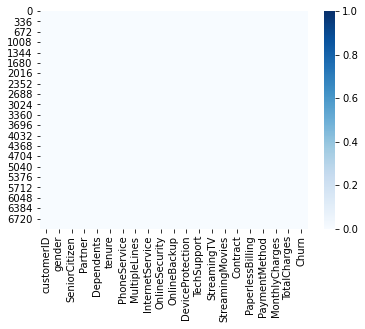

In [8]:
#data visualisation
sns.heatmap(df.isnull(),cmap='Blues')

In [9]:
#%age data missing
for i in df.columns:
    print('% data missing in',i,'is:',(df[i].isnull().sum()/df.shape[0])*100)

% data missing in customerID is: 0.0
% data missing in gender is: 0.0
% data missing in SeniorCitizen is: 0.0
% data missing in Partner is: 0.0
% data missing in Dependents is: 0.0
% data missing in tenure is: 0.0
% data missing in PhoneService is: 0.0
% data missing in MultipleLines is: 0.0
% data missing in InternetService is: 0.0
% data missing in OnlineSecurity is: 0.0
% data missing in OnlineBackup is: 0.0
% data missing in DeviceProtection is: 0.0
% data missing in TechSupport is: 0.0
% data missing in StreamingTV is: 0.0
% data missing in StreamingMovies is: 0.0
% data missing in Contract is: 0.0
% data missing in PaperlessBilling is: 0.0
% data missing in PaymentMethod is: 0.0
% data missing in MonthlyCharges is: 0.0
% data missing in TotalCharges is: 0.1561834445548772
% data missing in Churn is: 0.0


In [10]:
#dropping null values from total charges column which contain .15% missing data
df.dropna(inplace=True)

In [11]:
#%age data missing
for i in df.columns:
    print('% data missing in',i,'is:',(df[i].isnull().sum()/df.shape[0])*100)

% data missing in customerID is: 0.0
% data missing in gender is: 0.0
% data missing in SeniorCitizen is: 0.0
% data missing in Partner is: 0.0
% data missing in Dependents is: 0.0
% data missing in tenure is: 0.0
% data missing in PhoneService is: 0.0
% data missing in MultipleLines is: 0.0
% data missing in InternetService is: 0.0
% data missing in OnlineSecurity is: 0.0
% data missing in OnlineBackup is: 0.0
% data missing in DeviceProtection is: 0.0
% data missing in TechSupport is: 0.0
% data missing in StreamingTV is: 0.0
% data missing in StreamingMovies is: 0.0
% data missing in Contract is: 0.0
% data missing in PaperlessBilling is: 0.0
% data missing in PaymentMethod is: 0.0
% data missing in MonthlyCharges is: 0.0
% data missing in TotalCharges is: 0.0
% data missing in Churn is: 0.0


In [12]:
#convert Total to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [13]:
# Checking Duplicates
df.duplicated().sum()

0

Observation: No duplicates are present in our data frame

# Exploratory Data Analysis:

In [15]:
#Removing Unnecessary column customerID in the dataset
df.drop(['customerID'],axis=1,inplace=True)

In [16]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Univariate Ananlysis(Numerical Data):

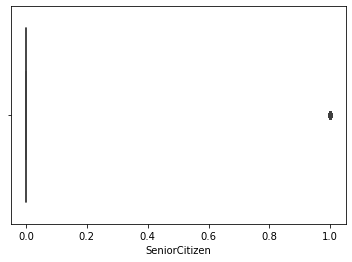

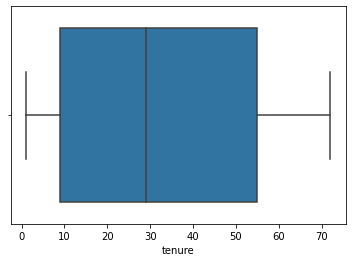

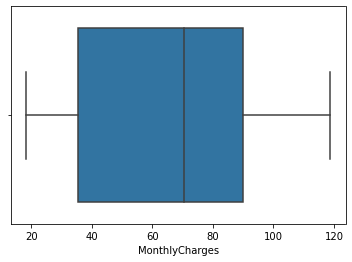

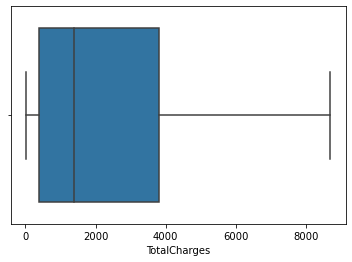

In [17]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.boxplot(x=i,data=df)
        plt.show()    

Observation:

    1.Maximum Tenure period is around 70 months and minimum around 0 months and the average is around 30months.
    
    2.Maximum MonthlyCharges is around 120 and minimum around 20 and the average monthly charges is around 70.
    
    3.Maximum TotalCharges is around 8500 and minimum around 0 and the average TotalCharges is around 0months.

# Univariate Analysis(Categorical Data):

In [18]:
for i in df.columns:
    if (df[i].dtypes=='object'):
        print(f'================================{i}===================================')
        print(df[i].value_counts())
        print('\n')

================================gender===================================
Male      3549
Female    3483
Name: gender, dtype: int64


================================Partner===================================
No     3639
Yes    3393
Name: Partner, dtype: int64


================================Dependents===================================
No     4933
Yes    2099
Name: Dependents, dtype: int64


================================PhoneService===================================
Yes    6352
No      680
Name: PhoneService, dtype: int64


================================MultipleLines===================================
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


================================InternetService===================================
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


================================OnlineSecurity===================================
No       

In [19]:
#Replacing 'No internet service' and 'No phone service' with 'No'
df.replace(['No internet service','No phone service'], 'No', inplace=True)

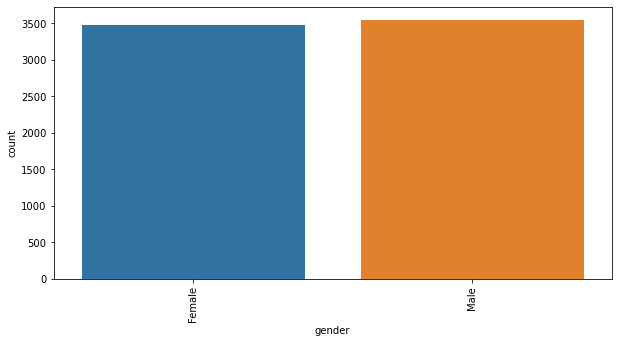

<Figure size 720x360 with 0 Axes>

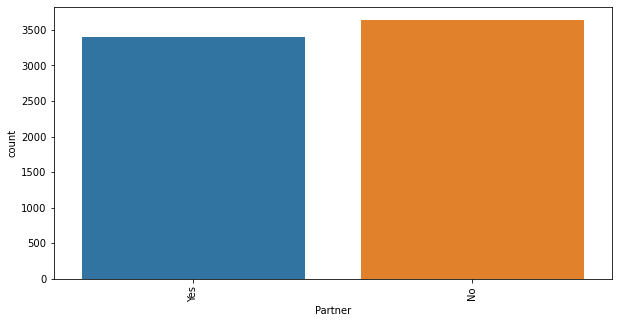

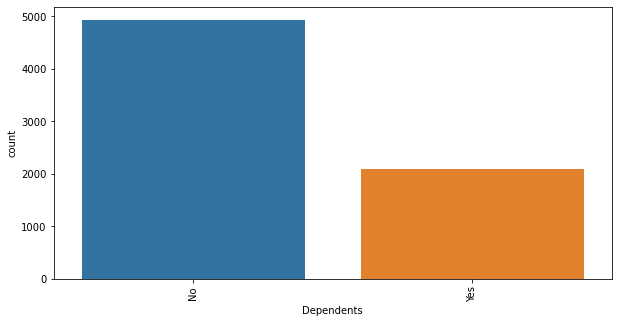

<Figure size 720x360 with 0 Axes>

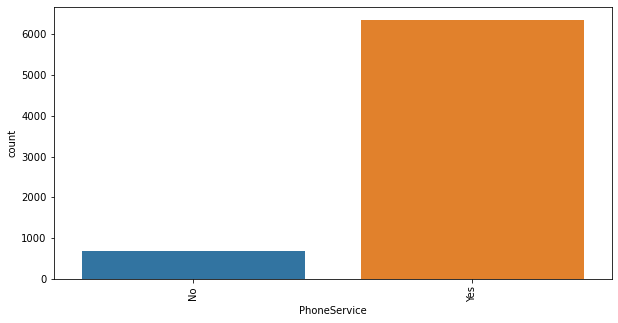

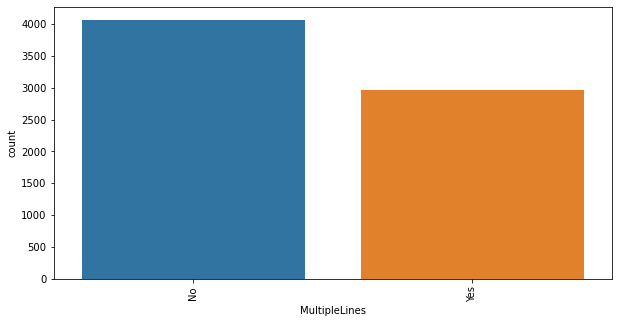

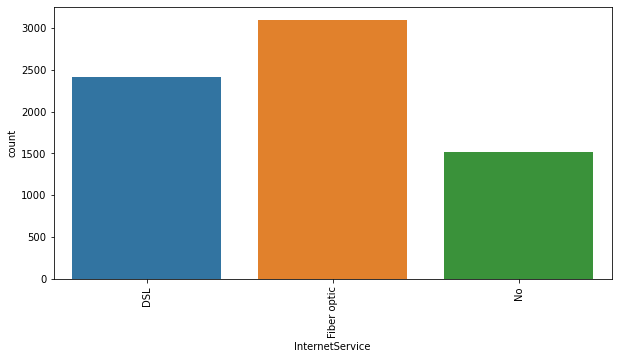

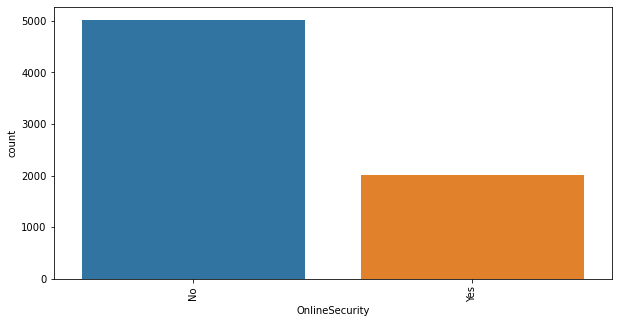

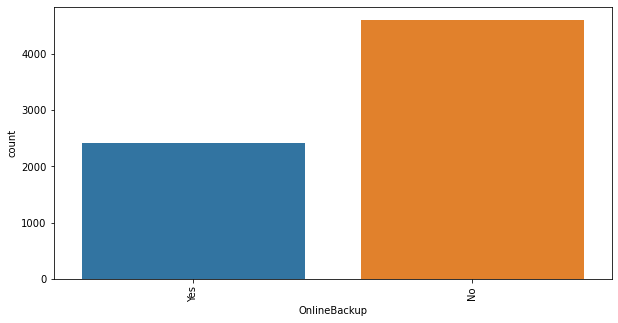

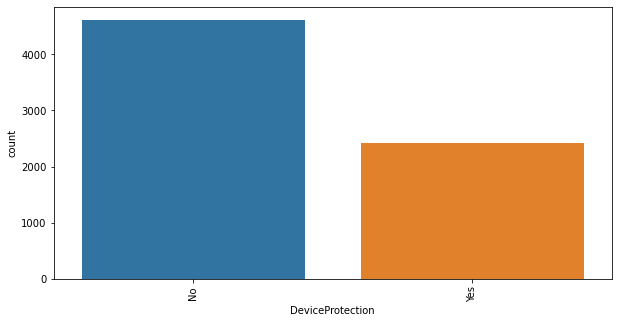

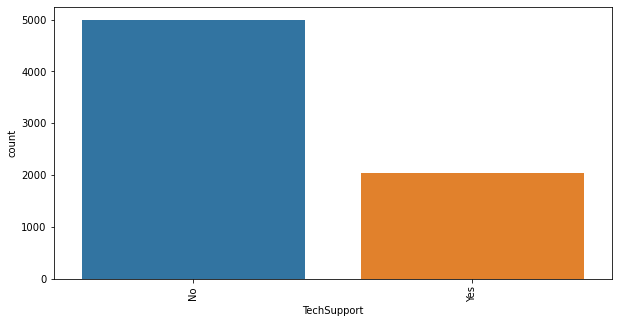

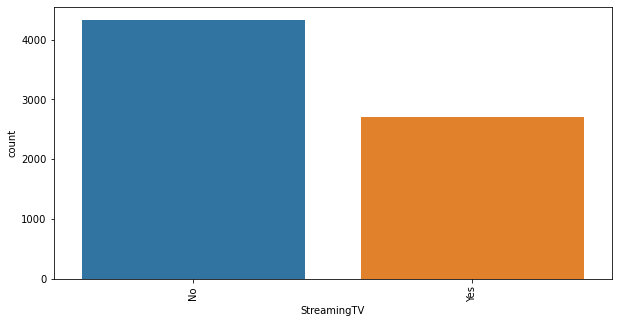

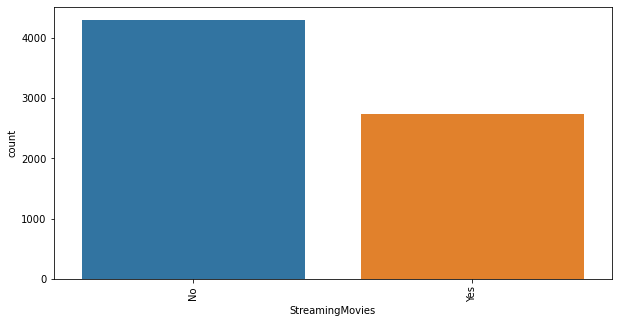

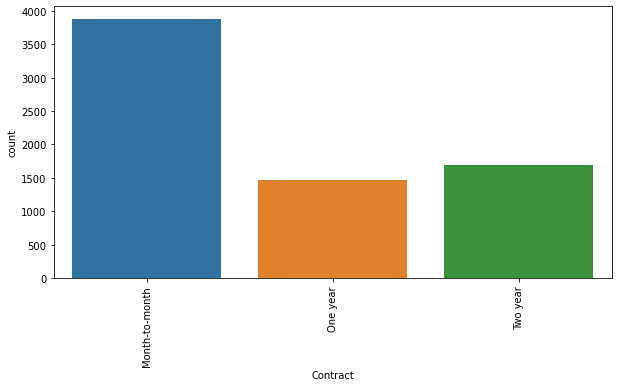

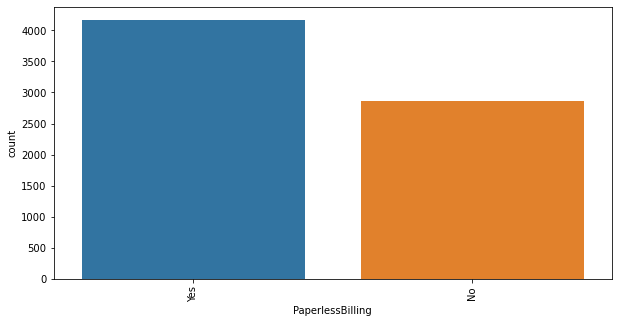

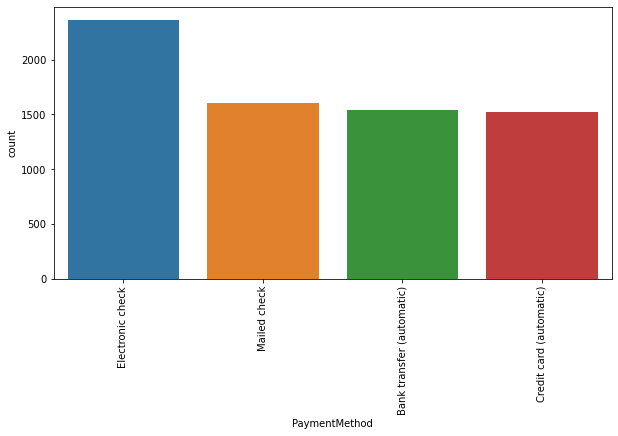

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

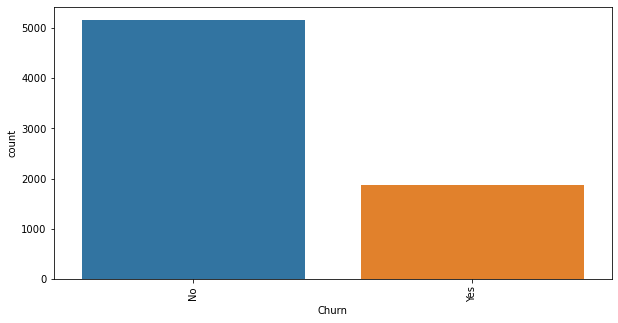

In [20]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    if (df[i].dtypes=='object'):
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show()

Key Observation:
    
1.There is almost equal amount of male and female cusyomer.

2.Customer with partner have slightly higher majority.

3.Majority of customer donot have dependents.

4.Majority of customer have Phoneservice and only few are there who donot have.

5.Majority of customer donot have MultipleLines but there are also many customers who have multiplelines.

6.Majority of customer uses Fiber optic for InternetService.

7.Majority of service provider donot provide online security.

8.Majority of service provider donot provide online backup.

9.Majority of service provider donot provide DeviceProtection.

10.Majority of service provider donot provide Techsupport

11.Majority of customer have not opted for streaming tv.

12.Majority of customer have not opted for streaming movies.

13.Majority of customer have opted for month to month subscription.

14.Majority of customer uses Electronic Check for payment method.

# Bivariate Analysis:

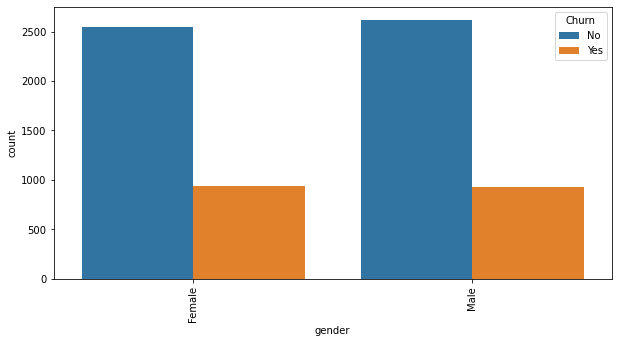

<Figure size 720x360 with 0 Axes>

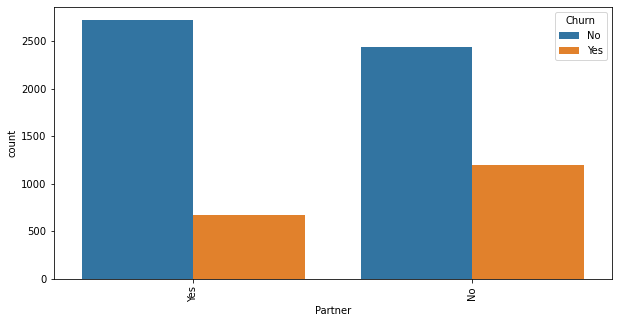

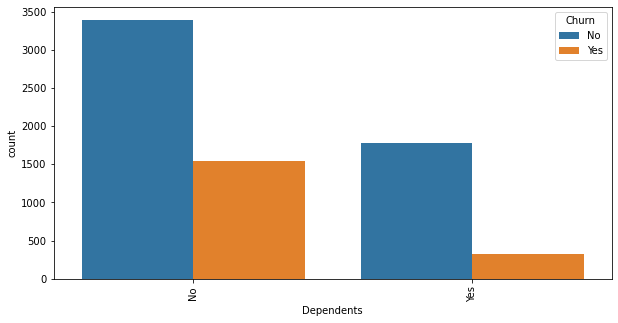

<Figure size 720x360 with 0 Axes>

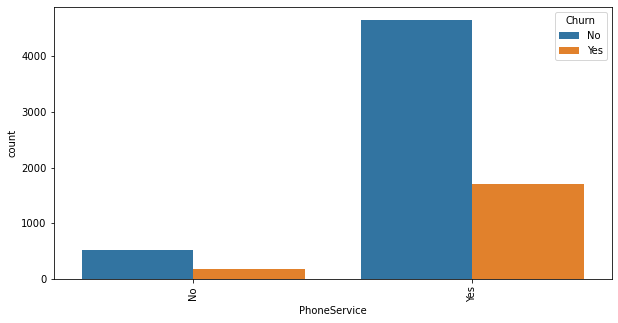

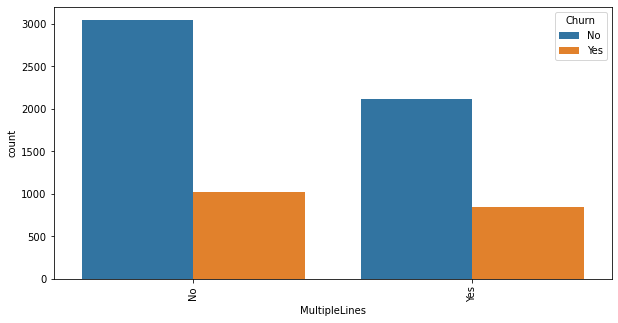

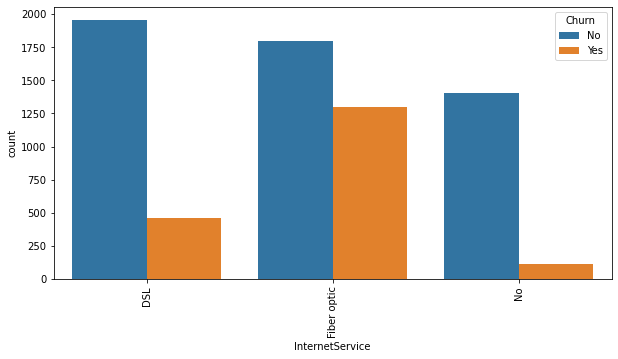

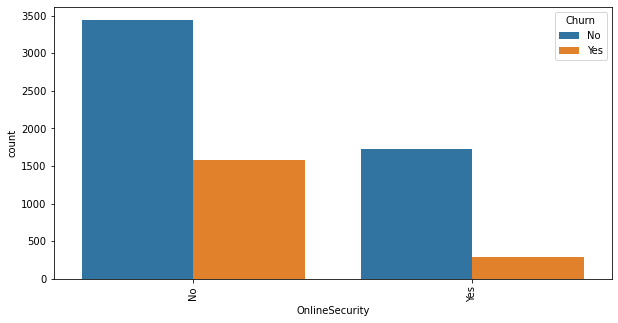

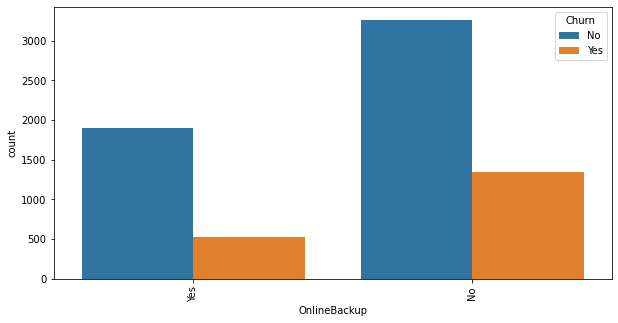

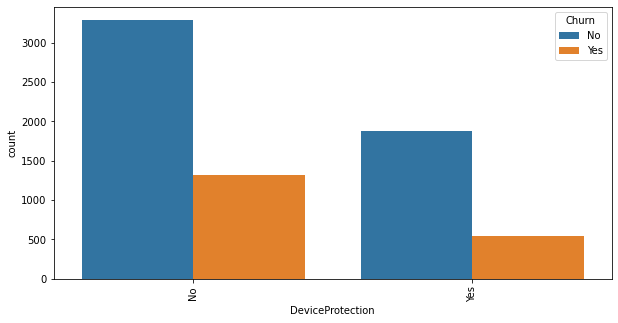

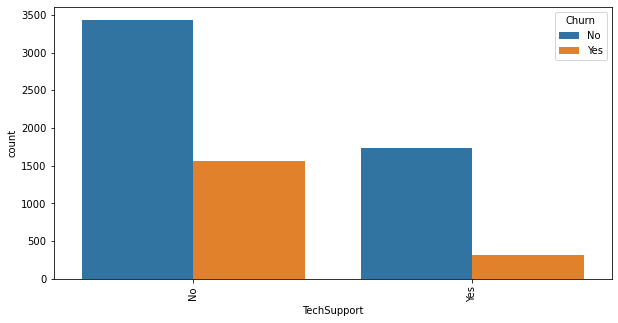

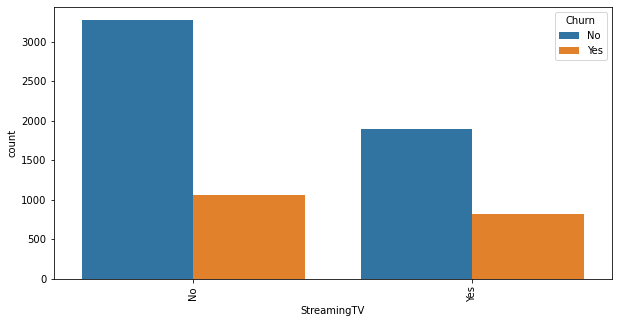

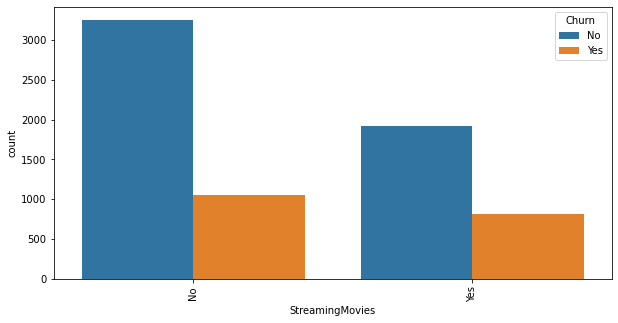

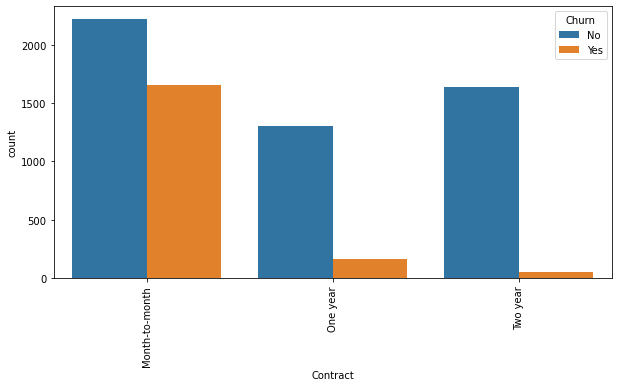

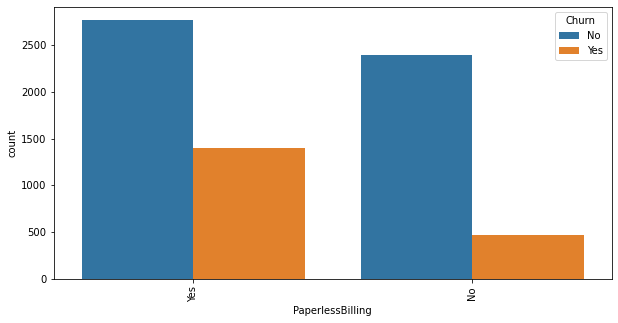

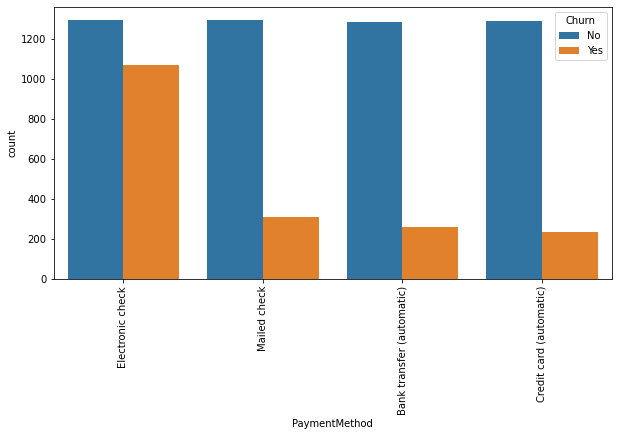

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

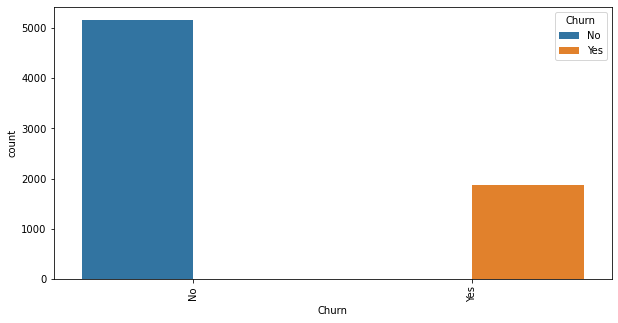

In [21]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    if (df[i].dtypes=='object'):
        plt.xticks(rotation=90)
        sns.countplot(x=i,hue='Churn',data=df)
        plt.show()

In [22]:
for i in df.columns:
    if (df[i].dtypes=='object'):
        print(pd.crosstab(df[i],df['Churn']).apply(lambda x:round(x/x.sum()*100,1),axis=1))
        print('\n')

Churn     No   Yes
gender            
Female  73.0  27.0
Male    73.8  26.2


Churn      No   Yes
Partner            
No       67.0  33.0
Yes      80.3  19.7


Churn         No   Yes
Dependents            
No          68.7  31.3
Yes         84.5  15.5


Churn           No   Yes
PhoneService            
No            75.0  25.0
Yes           73.3  26.7


Churn            No   Yes
MultipleLines            
No             74.9  25.1
Yes            71.4  28.6


Churn              No   Yes
InternetService            
DSL              81.0  19.0
Fiber optic      58.1  41.9
No               92.6   7.4


Churn             No   Yes
OnlineSecurity            
No              68.6  31.4
Yes             85.4  14.6


Churn           No   Yes
OnlineBackup            
No            70.8  29.2
Yes           78.4  21.6


Churn               No   Yes
DeviceProtection            
No                71.3  28.7
Yes               77.5  22.5


Churn          No   Yes
TechSupport            
No           68.8 

Key Observation:
    
1.There is negligible difference in customer percentage/count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

2.Customer with Month-to-Month Contract have higher churn rate as compared to customrs with One Year Contract and with Two Year Contract

3.Major customers who moved out were having Electronic Check as Payment Method. Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

4.customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service. Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

5.Customers without dependents are more likely to churn

6.most customers churn due to lack of online security

7.Customers with Paperless Billing are most likely to churn.

8.customers with no TechSupport are most likely to migrate to another service provider.

9.Customers without partner are more likely to churn.

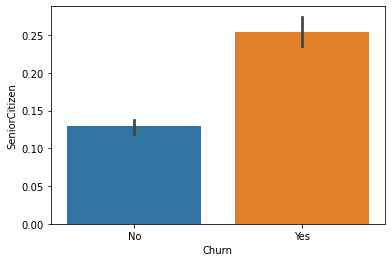

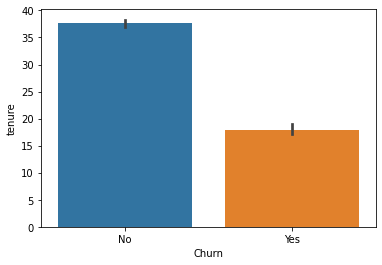

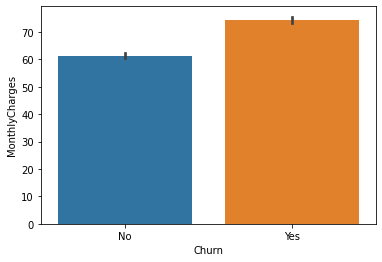

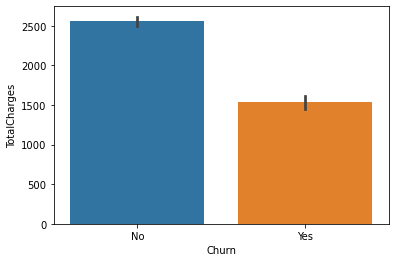

In [23]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.barplot(y=i,x='Churn',data=df)
        plt.show()    

Key Observations:
    
1.Customers with higher Monthly Charges are also more likely to churn.

2.Senior Citizens have higher churn rate.

3.New customers are more likely to churn.

4.As the Totalcharges increases churn rate decreases.

# Data Set Description

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


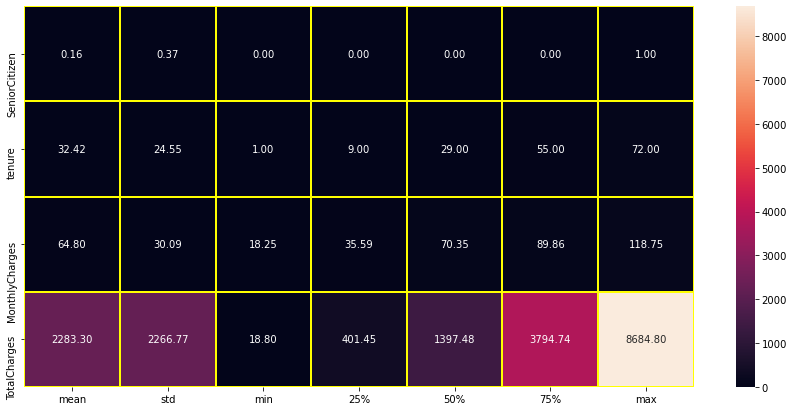

In [25]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

Key Observation:
    
1.The mean and median are very close indicating normally distribution.

2.Difference between max and 75% indicates in TotalCharges column  indicaes possibility of outliers.

In [26]:
# Converting target to Numerical Data
df['Churn']=df['Churn'].replace('Yes',1)
df['Churn']=df['Churn'].replace('No',0)

# Correlation

In [27]:
df.corr()['Churn'].sort_values()

tenure           -0.354049
TotalCharges     -0.199484
SeniorCitizen     0.150541
MonthlyCharges    0.192858
Churn             1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

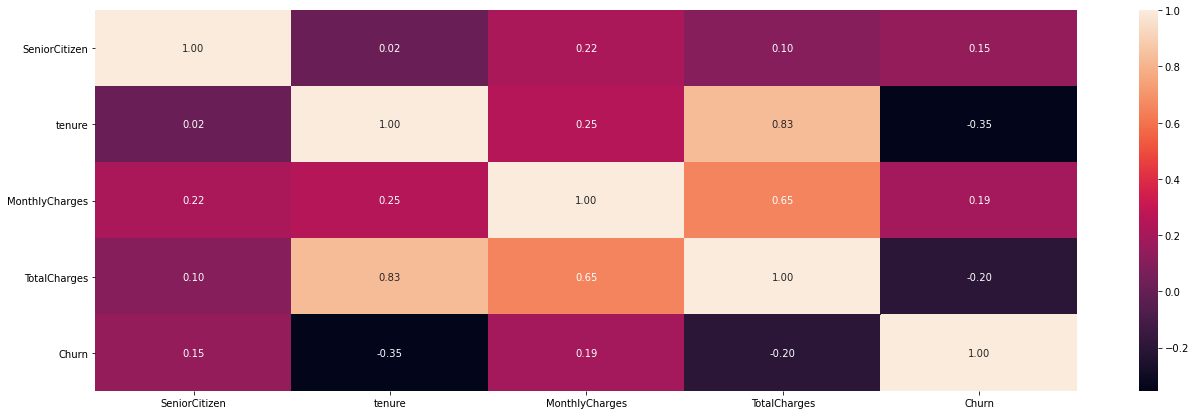

In [28]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='yellow')

Key Observation:
    
MonthlyCharges have highest correlation with target while Tenure have the least.

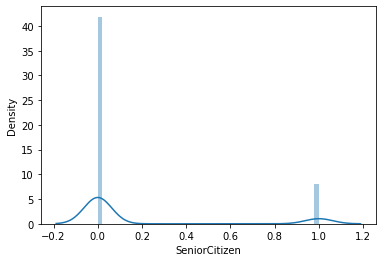

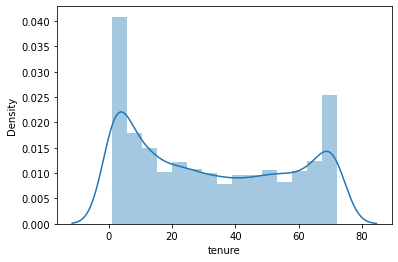

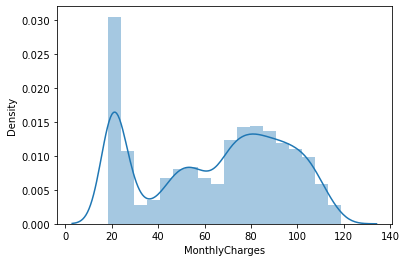

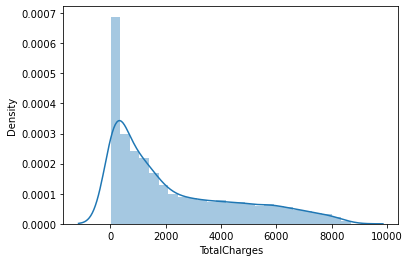

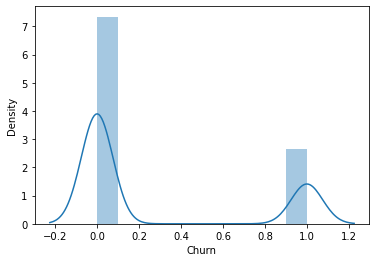

In [29]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.distplot(df[i])
        plt.show()

Observation:
    
MonthlyCharges and tenure are kind of normally distributed,while total charges is right skewed.

# Outliers Checking:

SeniorCitizen        AxesSubplot(0.125,0.71587;0.110714x0.16413)
tenure            AxesSubplot(0.257857,0.71587;0.110714x0.16413)
MonthlyCharges    AxesSubplot(0.390714,0.71587;0.110714x0.16413)
TotalCharges      AxesSubplot(0.523571,0.71587;0.110714x0.16413)
Churn             AxesSubplot(0.656429,0.71587;0.110714x0.16413)
dtype: object

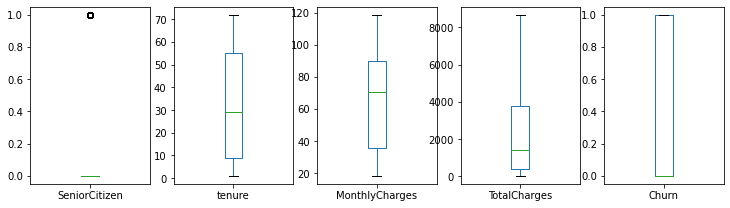

In [30]:
df.plot(kind='box',subplots=True,layout=(4,6),figsize=(15,15))

Observation:
    
No outliers are present.

# Data Preprocessing

# Converting string data to numeric data

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [32]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Skewness Treatment:

In [33]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

In [34]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.15999612, -1.81006854],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.24134546,  0.25425652],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.34453193, -1.38609098],
       ...,
       [-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.16868516, -0.85839282],
       [ 0.99065797,  2.27103902,  1.03561683, ...,  1.32047796,
         0.33273687, -0.92147688],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -1.48978043,
         1.33845304,  1.48336977]])

In [35]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.15999612, -1.81006854],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.24134546,  0.25425652],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.34453193, -1.38609098],
       ...,
       [-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.16868516, -0.85839282],
       [ 0.99065797,  2.27103902,  1.03561683, ...,  1.32047796,
         0.33273687, -0.92147688],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -1.48978043,
         1.33845304,  1.48336977]])

# Balancing the dataset

In [36]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [37]:
y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

# Model Building:

In [38]:
# Since our outcome has only two variable we will use binary classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))
        print('\n')

At random state 22 The model performs very well
Training Accuracy Score is: 77.7
Testing Accuracy Score is: 77.7


At random state 55 The model performs very well
Training Accuracy Score is: 77.5
Testing Accuracy Score is: 77.5


At random state 81 The model performs very well
Training Accuracy Score is: 77.7
Testing Accuracy Score is: 77.7


At random state 108 The model performs very well
Training Accuracy Score is: 77.7
Testing Accuracy Score is: 77.7


At random state 159 The model performs very well
Training Accuracy Score is: 77.7
Testing Accuracy Score is: 77.7


At random state 190 The model performs very well
Training Accuracy Score is: 77.6
Testing Accuracy Score is: 77.6


At random state 191 The model performs very well
Training Accuracy Score is: 77.8
Testing Accuracy Score is: 77.8


At random state 226 The model performs very well
Training Accuracy Score is: 77.6
Testing Accuracy Score is: 77.6


At random state 239 The model performs very well
Training Accuracy Score is

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Logistic Regression Model

In [40]:
#selecting random state=21
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=21,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))

Training Accuracy Score is: 77.7
Testing Accuracy Score is: 77.6


# CROSS VALIDATION OF THE MODEL

In [41]:
from sklearn.model_selection import cross_val_score
for k in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',accuracy_score(y_train,pred_train))
    print('testing score :',accuracy_score(y_test,pred_test))
    print('\n')

At crossfold= 2 the cv score is 0.7728065078442765
training score : 0.776997578692494
testing score : 0.7763794772507261


At crossfold= 3 the cv score is 0.7749370521014914
training score : 0.776997578692494
testing score : 0.7763794772507261


At crossfold= 4 the cv score is 0.7740668641214428
training score : 0.776997578692494
testing score : 0.7763794772507261


At crossfold= 5 the cv score is 0.7743566424223388
training score : 0.776997578692494
testing score : 0.7763794772507261


At crossfold= 6 the cv score is 0.7760991671508813
training score : 0.776997578692494
testing score : 0.7763794772507261


At crossfold= 7 the cv score is 0.7760996607544769
training score : 0.776997578692494
testing score : 0.7763794772507261


At crossfold= 8 the cv score is 0.7749395787172975
training score : 0.776997578692494
testing score : 0.7763794772507261


At crossfold= 9 the cv score is 0.7749407550745081
training score : 0.776997578692494
testing score : 0.7763794772507261




In [42]:
#selecting cv=7
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for i in model:
    i.fit(x_train,y_train)
    ipred=i.predict(x_test)
    i.score(x_train,y_train)
    print(i)
    print('accuracy score:',accuracy_score(y_test,ipred))
    cv_score=cross_val_score(i,x,y,cv=7)
    cv_mean=cv_score.mean()
    print('the cv score is',cv_mean)
    print(confusion_matrix(y_test,ipred))
    print(classification_report(y_test,ipred))
    print('\n')

DecisionTreeClassifier()
accuracy score: 0.7957405614714425
the cv score is 0.7876307276389954
[[809 218]
 [204 835]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1027
           1       0.79      0.80      0.80      1039

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



KNeighborsClassifier()
accuracy score: 0.7846079380445304
the cv score is 0.7949850718846172
[[663 364]
 [ 81 958]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1027
           1       0.72      0.92      0.81      1039

    accuracy                           0.78      2066
   macro avg       0.81      0.78      0.78      2066
weighted avg       0.81      0.78      0.78      2066



SVC()
accuracy score: 0.8155856727976767
the cv score is 0.8073829537326851
[[767 260]
 [121 918]]
         

# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
#tuning random forest model
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rf=RandomForestClassifier()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 350}


In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=350,max_features='auto',max_depth=10)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,rfpred))
cv_score=cross_val_score(rf,x,y,cv=7)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

accuracy score: 0.8431752178121975
the cv score is 0.8393434910136026
[[809 218]
 [106 933]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1027
           1       0.81      0.90      0.85      1039

    accuracy                           0.84      2066
   macro avg       0.85      0.84      0.84      2066
weighted avg       0.85      0.84      0.84      2066



In [46]:
#tuning gradient boosting model
grid_param={'n_estimators':[100,150,200,250,300],'learning_rate':[0.1,0.01,0.001,1,10,100]}
model=GradientBoostingClassifier()
grid=GridSearchCV(estimator=model,param_grid=grid_param,scoring='accuracy',cv=7)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1, 10, 100],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')
0.8437068314993077
friedman_mse
{'learning_rate': 0.1, 'n_estimators': 300}


In [47]:
gb=GradientBoostingClassifier(n_estimators=300,learning_rate=0.1)    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,gbpred))
cv_score=cross_val_score(gb,x,y,cv=7)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

accuracy score: 0.846079380445305
the cv score is 0.8438036837995498
[[835 192]
 [126 913]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1027
           1       0.83      0.88      0.85      1039

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



In [48]:
#tuning xgboost model
parameters={'booster':['gbtree','gblinear'],'max_depth':[5,10],'learning_rate':[0.1,0.001,1,10],'n_estimators':[100,200,300,350]}
xgc=XGBClassifier()
xgcg=GridSearchCV(xgc,parameters)
xgcg.fit(x_train,y_train)
print(xgcg.best_params_)

[23:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [53]:
xgc=XGBClassifier(n_estimators=200,learning_rate=0.1,booster='gbtree',max_depth=5)
xgc.fit(x_train,y_train)
xgcpred=xgc.predict(x_test)
xgc.score(x_train,y_train)
cv_score=cross_val_score(xgc,x,y,cv=7)
print('accuracy score:',accuracy_score(y_test,xgcpred))
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print(confusion_matrix(y_test,xgcpred))
print(classification_report(y_test,xgcpred))
    

[23:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# CONCLUSION:

Selecting XGBoosting Classifier as our final model as the model is performing extremely well having cv score and testing score almost equal.

# ROC AUC CURVE

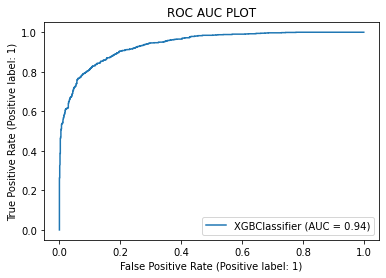

In [54]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgc,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

AUC score is 94%

In [55]:
original=np.array(y_test)
predicted=np.array(xgcpred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted},index=range(len(original)))
df_com

,Original,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2061,0,0
2062,0,0
2063,1,1
2064,0,0


# SAVING BEST MODEL

In [56]:
import joblib
joblib.dump(xgc,'xgcfile.obj')

['xgcfile.obj']